### Jahed Prince 
## Suicide (Final Project)

Suicide is an intense complex issue that occurs throughout the world, affecting hundreds of thousands of individuals every year around the world.  It is an extremely sensitive topic and one that society tends to ignore. The stigma around mental illnesses and suicide should be removed from society and discussed openly. Furthermore, it’s important that we speak more on it so we can find the best approaches toward prevention. 

My goal for this project is to explore the statisitcs of suicide rates by conitnent, age, gender, and income. I will also look to see if there is a statisically significant difference in the suicide rates between men and women. By finding these different statistics, I gain to bring more awareness to this topic. 

The data that I will be using to pull this from Wikipedia and the World Health Organization. I've pulled it down to my local computer for ease of use.

I'll first import the necessary packages down, as well as downloading and cleaning the data. 

In [43]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Suicide Rates by Continent

First I'll do an exploratory analysis of suicide rates by continent to see how suicide rates differ throughout the world.

The data that I will be using to pull this is from the World Health Organization, located [here](http://apps.who.int/gho/data/node.sdg.3-4-data?lang=en). I've pulled it down to my local computer for ease of use.

In [44]:
country = pd.read_csv('data.csv', header=0)
continents = pd.read_csv('continents.csv')
new_df = country.merge(continents, how='inner', left_on='Country', right_on='Country(or dependent territory)')

In [45]:
new_df = new_df[['Country', 'Both sexes  (per 100 000 population)', 'Continent']]
new_df.head()

,Country,Both sexes (per 100 000 population),Continent
0,Afghanistan,4.7,Asia
1,Albania,6.3,Europe
2,Algeria,3.2,Africa
3,Angola,4.7,Africa
4,Antigua and Barbuda,0.5,North America


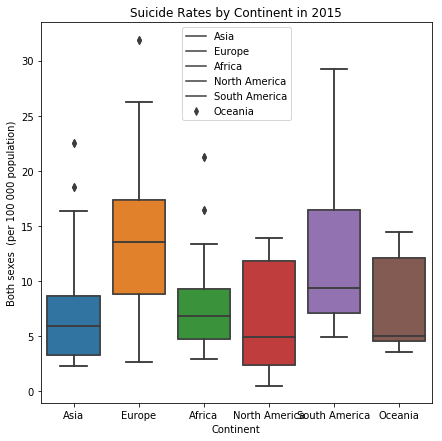

In [46]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='Continent', y='Both sexes  (per 100 000 population)', data=new_df)
plt.title('Suicide Rates by Continent in 2015')
plt.gca().legend(new_df['Continent'].unique())
sns.boxplot(x='Continent', y='Both sexes  (per 100 000 population)', data=new_df)
plt.title('Suicide Rates by Continent in 2015')
plt.gca().legend(new_df['Continent'].unique())

As we can see in the boxplot above, Europe has the highest suicide rate and North America has the lowest suicide rate. 

### Relationship Between Family Income & Suicide Rates

Now I will see how income has an affect on suicide rates. The data that I will be using to pull this is from Wikipedia, located [here](https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate#cite_note-22).

In [39]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate#cite_note-22')
print(len(tables))

8


In [40]:
income = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate#cite_note-22', header=0)[3]

In [41]:
income[['Income group (% of global pop)', 'Suicides, 2012(in thousands)']].head()

,Income group (% of global pop),"Suicides, 2012(in thousands)"
0,High-income countries (18.3%),197
1,Upper-middle-income countries (34.3%),192
2,Lower-middle-income countries (35.4%),333
3,Low-income countries (12.0%),82
4,Global (100.0%),804


Text(0.5, 0, 'Income Group (% of Global Population)')

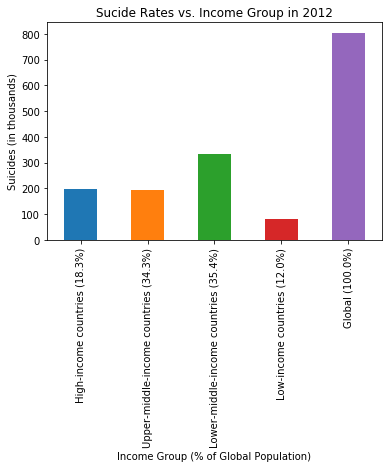

In [42]:
income.head().plot.bar(x='Income group (% of global pop)', y='Suicides, 2012(in thousands)', legend=False)
plt. ylabel('Suicides (in thousands)')
plt.title('Sucide Rates vs. Income Group in 2012')
plt.xlabel('Income Group (% of Global Population)')

The bar plot above shows that lower-middle income countries have the highest suicide rate, and low-income countries have the lowest suicide rate and make up 12% of the global suicide rate. 

### Gender Differences in Suicide Rates 

Next, I'll see the relationship between male and female suicide rates around the world and compare the two. 

The data that I will be using to pull this is from the World Health Organization, located [here](http://apps.who.int/gho/data/view.sdg.3-4-data-reg?lang=en). I've pulled it down to my local computer for ease of use.

In [49]:
suicide_2016 = pd.read_csv('suicide2016.csv', header=0)
suicide_2016

,WHO region,Male,Female
0,Africa,9.9,4.8
1,Americas,15.1,4.6
2,South-East Asia,14.8,11.6
3,Europe,24.7,6.6
4,Eastern Mediterranean,5.1,2.7
5,Western Pacific,10.9,9.4
6,(WHO) Global,13.5,7.7


Text(0.5, 0, 'Region')

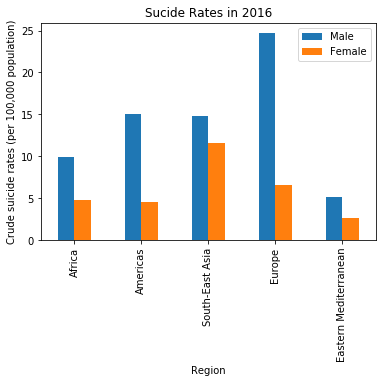

In [50]:
suicide_2016.head().plot.bar(x='WHO region', y=['Male', 'Female'])
plt. ylabel('Crude suicide rates (per 100,000 population)')
plt.title('Sucide Rates in 2016')
plt.xlabel('Region')

The bar plot above indicates that in every region the male suicide rate is higher than the female suicide rate. We can also see that Europe has the highest male suicide rate compared to the rest of the world, whereas South-East Asia has the highest female suicide rate. Furthermore, the Eastern Mediterranean seems to have the lowest sucide rate for both males and females. 

#### Two-Sample Test for Suicide Rates between Males & Females: 

We are testing to see if there is a significant (not due to chance) difference in average suicide rates between males and females. The null hypothesis (H0) is that there is no difference between the two rates. The alternative hypothesis (H1) is that there is a difference in average suicide rates between males and females. 

Below are the two means and variance of male and female suicide rates:

In [7]:
#mean and variance of male suicide rates
a = suicide_2016['Male']
print(np.mean(a))
print(np.var(a, ddof=1))

13.428571428571429
36.65571428571428


In [8]:
#mean and variance of female suicide rates
b = suicide_2016['Female']
print(np.mean(b))
print(np.var(b, ddof=1))

6.771428571428572
9.382380952380952


The difference in means between the two rates is about -6.571. 

In [27]:
#difference in mean suicide rates between males and females
np.mean(b) - np.mean(a)

-6.657142857142857

Below is the pooled variance of the two suicide rates:

In [17]:
#pooled variance of the two rates
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

pooled_var = custom_pooled_variance(a, b)
pooled_var

6.576870748299318

And below is the pooled standard deviation of the two suicide rates:

In [18]:
#pooled standard deviation of the two rates
np.sqrt(pooled_var)

2.5645410404786504

Using the CDF function below to see the percentile of our sample mean, we can rejct the null hypothesis that the two samples have the same mean.

In [22]:
stats.t(loc=0, scale=np.sqrt(pooled_var), df=8).cdf(-50)

2.488493244273148e-08

Below is a two-sided test done by the module in stats to see if the mean between males and females are different: 

In [24]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=2.5958418103148606, pvalue=0.023404595984351167)

The results indicate that there is a statistically significant difference between the mean suicide rates for males and females (t = 2.595, p = 0.023) because the p-value is less than 0.05. In other words, males (13.43) have a statistically significantly higher mean sucide rate mean than females (6.77).

Below is a T-distribution with a mean of 0 and our pooled standard deviation, along with 8 degrees of freedom (our combined number of samples minus 2). 

The test can also be evaluated using a rejection region, similar to a regular hypothesis test. If the mean difference is less than the the shaded region in the T-distribution, we will have to reject the null hypothesis that there is no difference in average suicide rates between males and females. 

Text(0.5, 0.92, 'T-Distribution of Difference Between Mean Suicide Rate in Males & Females')

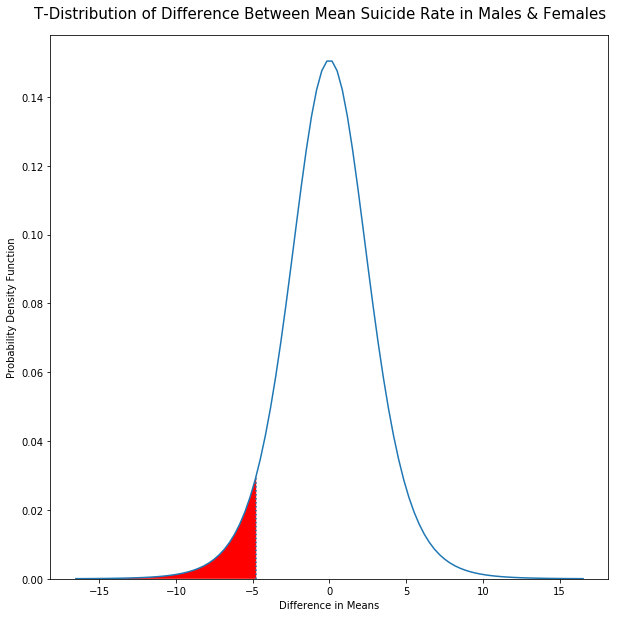

In [15]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=8)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Mean Suicide Rate in Males & Females', fontsize=15, y=0.92)

The figure above shows that the difference between the two mean suicide rates is in the shaded region and below the threshold. Thus, we will have to reject the null hypotheis and accept the alternative hypothesis that the difference is statistically significant.   

### Conclusion

The data above can be used to explain why certain continents/regions have higher suicide rates. Income can be a factor to these high suicide rates and may explain why Euopre has the highest suicide rate. Furthemore, we can conclude that the difference between suicide rates in males and females is significant. We as society can come to a conclusion as to why this. Perhaps, toxic mascuilinity may have a huge factor in this gender difference becasue men tend to "hide their feelings." 

Suicide should be discussed more often, so the stigma around it can be removed. If you are dealing with suicidal thoughts you can receive immediate help by visiting suicide.org, or by calling 1-800-SUICIDE in the US.